# Feature Selection: Remove correlated features - demo on Iris Dataset

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

## Overview

Correlation commonly refers to the degree to which a pair of variables are linearly related.

Features which are highly correlated is expected to have the same effect on the dependent variable, so we can drop one of them.

## Prepare the data

In [106]:
# Load the data
iris = datasets.load_iris()

In [107]:
# Create the DataFrame

iris_df = pd.DataFrame(data = iris.data, columns=iris.feature_names)

# add the 'target' column at the end
iris_df['target'] = iris.target
iris_df.head(5)

# lets look at the data, grouped by 'target' values
iris_df.groupby('target').mean().round(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.01,3.43,1.46,0.25
1,5.94,2.77,4.26,1.33
2,6.59,2.97,5.55,2.03


In [108]:
# separate X and y
X = iris_df.iloc[:, :4]
print(X.head(3))

y = iris_df.target
print(y.head(3))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
0    0
1    0
2    0
Name: target, dtype: int64


## Remove features with high correlation 

### Look at correlations

In [132]:
#get correlations of each features in dataset
corrmat = X.corr()
# print(corrmat)

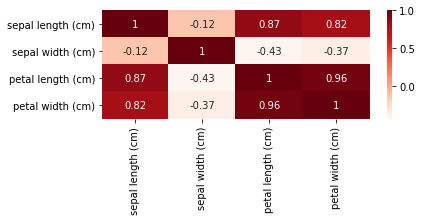

In [134]:
# plot the correlation heat-map

plt.figure(figsize=(6,2))
g=sns.heatmap(corrmat,annot=True,cmap="Reds")

### remove correlated columns

In [135]:
def remove_correlated_columns(X,corr_threshold):
    # изчисляваме корелациите:
    corrmat = X.corr()
    
    # правим Булев масив с размерност - броя на колоните, в който с True ще обозначаваме колона, която искаме да остане, със False - колона, която ще се премахне
    # в началото, задаваме True за всяка една колона: 
    columns_retained_mask = np.full((corrmat.shape[0],), True, dtype=bool)

    # взимаме броя на редовете и колоните
    rows = cols = corrmat.shape[0];

    # цикъл по елементите над лавния диагонал (виж примера по-долу)
    for i in range(rows):
        for j in range(i+1,cols):        
            corr_value = corrmat.iloc[i,j];
#             print(corr_value.round(2))

            # ако стойността е над прага - маркираме дадената колона в масива columns_retained_mask с False:
            if corr_value >= corr_threshold:
                columns_retained_mask[j] = False
#                 print(f'"{corrmat.columns[j]}" is correlated with "{corrmat.index.values[i]}"')
                # възможно подобрение - ако вече сме сетнали False, няма смисъл да го правим отново


    print('*' * 80)
    print(f'columns {list(X.columns[ np.logical_not(columns_retained_mask)] )} marked for removing')
    print('*' * 80)
    # връщаме онези фитчъри, които искаме да останат
    return X.loc[:,columns_retained_mask]
    

In [137]:
corr_threshold = 0.8
X_new = remove_correlated_columns(X, corr_threshold)
print(X_new)

********************************************************************************
columns ['petal length (cm)', 'petal width (cm)'] marked for removing
********************************************************************************
     sepal length (cm)  sepal width (cm)
0                  5.1               3.5
1                  4.9               3.0
2                  4.7               3.2
3                  4.6               3.1
4                  5.0               3.6
..                 ...               ...
145                6.7               3.0
146                6.3               2.5
147                6.5               3.0
148                6.2               3.4
149                5.9               3.0

[150 rows x 2 columns]


Пример за обхождане на елементите над главния диагонал:

In [54]:
arr = np.arange(1,10).reshape(3,3)
print(arr)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [52]:
# list elements above main diagonal
rows = cols = arr.shape[0]

# цикъл по редовете:
for i in range(rows):
    print(f'row {i}')    
    # но от всеки ред, искаме само елементите, които започват от индекс i+1:
    for j in range(i+1,cols): 
        print(arr[i,j])

row 0
2
3
row 1
6
row 2
